In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_11_4.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_11_4.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(130, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(130, activation = 'relu'),
    tf.keras.layers.Dense(130, activation = 'relu'),
    tf.keras.layers.Dense(130, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/100
100000/100000 - 3s - loss: 0.2989 - accuracy: 0.8800 - val_loss: 0.2647 - val_accuracy: 0.8927
Epoch 2/100
100000/100000 - 1s - loss: 0.2551 - accuracy: 0.8944 - val_loss: 0.2440 - val_accuracy: 0.8979
Epoch 3/100
100000/100000 - 1s - loss: 0.2263 - accuracy: 0.9034 - val_loss: 0.2106 - val_accuracy: 0.9098
Epoch 4/100
100000/100000 - 1s - loss: 0.1965 - accuracy: 0.9145 - val_loss: 0.1886 - val_accuracy: 0.9166
Epoch 5/100
100000/100000 - 1s - loss: 0.1745 - accuracy: 0.9222 - val_loss: 0.1714 - val_accuracy: 0.9229
Epoch 6/100
100000/100000 - 1s - loss: 0.1561 - accuracy: 0.9293 - val_loss: 0.1558 - val_accuracy: 0.9295
Epoch 7/100
100000/100000 - 1s - loss: 0.1436 - accuracy: 0.9349 - val_loss: 0.1458 - val_accuracy: 0.9336
Epoch 8/100
100000/100000 - 1s - loss: 0.1327 - accuracy: 0.9402 - val_loss: 0.1372 - val_accuracy: 0.9394
Epoch 9/100
100000/100000 - 1s - loss: 0.1234 - accuracy: 0.9450 - val_loss: 0.1290 - val_accu

Epoch 77/100
100000/100000 - 2s - loss: 0.0195 - accuracy: 0.9928 - val_loss: 0.0486 - val_accuracy: 0.9846
Epoch 78/100
100000/100000 - 1s - loss: 0.0182 - accuracy: 0.9932 - val_loss: 0.0467 - val_accuracy: 0.9858
Epoch 79/100
100000/100000 - 1s - loss: 0.0191 - accuracy: 0.9929 - val_loss: 0.0505 - val_accuracy: 0.9845
Epoch 80/100
100000/100000 - 1s - loss: 0.0184 - accuracy: 0.9931 - val_loss: 0.0441 - val_accuracy: 0.9864
Epoch 81/100
100000/100000 - 1s - loss: 0.0186 - accuracy: 0.9932 - val_loss: 0.0501 - val_accuracy: 0.9851
Epoch 82/100
100000/100000 - 1s - loss: 0.0173 - accuracy: 0.9936 - val_loss: 0.0452 - val_accuracy: 0.9865
Epoch 83/100
100000/100000 - 1s - loss: 0.0181 - accuracy: 0.9933 - val_loss: 0.0525 - val_accuracy: 0.9841
Epoch 84/100
100000/100000 - 1s - loss: 0.0189 - accuracy: 0.9931 - val_loss: 0.0462 - val_accuracy: 0.9852
Epoch 85/100
100000/100000 - 1s - loss: 0.0159 - accuracy: 0.9940 - val_loss: 0.0476 - val_accuracy: 0.9858
Epoch 86/100
100000/100000 -

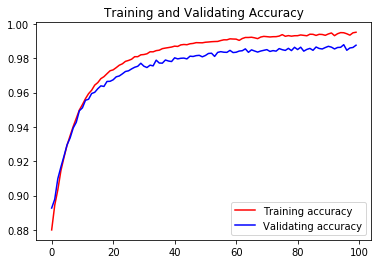

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_11_4_model.h5')